In [4]:
import pandas as pd
import mlxtend

In [5]:

import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Groceries data.csv")
df.head()


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [6]:
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [7]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

df["itemDescription"] = (
    df["itemDescription"]
    .astype(str)
    .str.strip()
    .str.lower()
)

df = df.dropna(subset=["Member_number", "Date", "itemDescription"])
df.head()


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [8]:
df["TransactionID"] = (
    df["Member_number"].astype(str) + "_" +
    df["Date"].dt.strftime("%Y-%m-%d")
)

df[["Member_number", "Date", "TransactionID", "itemDescription"]].head(10)

,Member_number,Date,TransactionID,itemDescription
0,1808,2015-07-21,1808_2015-07-21,tropical fruit
1,2552,2015-05-01,2552_2015-05-01,whole milk
2,2300,2015-09-19,2300_2015-09-19,pip fruit
3,1187,2015-12-12,1187_2015-12-12,other vegetables
4,3037,2015-01-02,3037_2015-01-02,whole milk
5,4941,2015-02-14,4941_2015-02-14,rolls/buns
6,4501,2015-08-05,4501_2015-08-05,other vegetables
7,3803,2015-12-23,3803_2015-12-23,pot plants
8,2762,2015-03-20,2762_2015-03-20,whole milk
9,4119,2015-12-02,4119_2015-12-02,tropical fruit


In [9]:
baskets = df.groupby("TransactionID")["itemDescription"].apply(list)

print("Number of transactions:", baskets.shape[0])
print("Example basket:", baskets.iloc[0])


Number of transactions: 14963
Example basket: ['whole milk', 'pastry', 'salty snack']


In [10]:
baskets = baskets.apply(lambda x: sorted(set(x)))

print("Example cleaned basket:", baskets.iloc[0])


Example cleaned basket: ['pastry', 'salty snack', 'whole milk']


In [11]:
from mlxtend.preprocessing import TransactionEncoder
basket_list = baskets.tolist()
te = TransactionEncoder()
te_array = te.fit(basket_list).transform(basket_list)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()


,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df1=pd.get_dummies(df)
df2=df1.iloc[:,1:]
df2.head()

,Date,year,month,day,day_of_week,itemDescription_abrasive cleaner,itemDescription_artif. sweetener,itemDescription_baby cosmetics,itemDescription_bags,itemDescription_baking powder,...,TransactionID_4998_2015-10-14,TransactionID_4999_2014-05-19,TransactionID_4999_2014-09-04,TransactionID_4999_2015-01-24,TransactionID_4999_2015-02-18,TransactionID_4999_2015-05-16,TransactionID_4999_2015-12-26,TransactionID_5000_2014-09-03,TransactionID_5000_2014-11-16,TransactionID_5000_2015-10-02
0,2015-07-21,2015,7,21,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015-05-01,2015,5,1,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2015-09-19,2015,9,19,5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2015-12-12,2015,12,12,5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2015-01-02,2015,1,2,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
from mlxtend.frequent_patterns import apriori
freq_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
freq_itemsets = freq_itemsets.sort_values("support", ascending=False)
freq_itemsets.head(15)


,support,itemsets
62,0.157923,(whole milk)
39,0.122101,(other vegetables)
45,0.110005,(rolls/buns)
51,0.097106,(soda)
63,0.085879,(yogurt)
46,0.069572,(root vegetables)
56,0.067767,(tropical fruit)
4,0.060683,(bottled water)
48,0.060349,(sausage)
14,0.053131,(citrus fruit)


In [14]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(freq_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(["lift", "confidence", "support"], ascending=False)

rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [15]:
useful_rules = rules[
    (rules["confidence"] >= 0.2) &
    (rules["lift"] >= 1.1) &
    (rules["support"] >= 0.005)
].copy()

useful_rules = useful_rules.sort_values(["lift","confidence"], ascending=False)
useful_rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [16]:
df_encoded.shape

(14963, 167)

In [17]:
freq_itemsets.head(10)

,support,itemsets
62,0.157923,(whole milk)
39,0.122101,(other vegetables)
45,0.110005,(rolls/buns)
51,0.097106,(soda)
63,0.085879,(yogurt)
46,0.069572,(root vegetables)
56,0.067767,(tropical fruit)
4,0.060683,(bottled water)
48,0.060349,(sausage)
14,0.053131,(citrus fruit)


In [18]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [19]:
rules_view = rules.copy()

rules_view["antecedents"] = rules_view["antecedents"].apply(lambda x: ', '.join(list(x)))
rules_view["consequents"] = rules_view["consequents"].apply(lambda x: ', '.join(list(x)))

rules_view[["antecedents","consequents","support","confidence","lift"]].head(15)


,antecedents,consequents,support,confidence,lift


In [20]:
good_rules = rules_view[
    (rules_view["support"] >= 0.001) &
    (rules_view["confidence"] >= 0.05) &
    (rules_view["lift"] >= 1.1)
].sort_values(["lift","confidence"], ascending=False)

good_rules[["antecedents","consequents","support","confidence","lift"]].head(20)

,antecedents,consequents,support,confidence,lift


In [21]:
print("Total rules:", rules.shape)
rules[["support","confidence","lift"]].describe()


Total rules: (0, 14)


,support,confidence,lift
count,0,0,0
unique,0,0,0
top,NaN,NaN,NaN
freq,NaN,NaN,NaN


In [22]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_itemsets = apriori(df_encoded, min_support=0.003, use_colnames=True)
freq_itemsets["length"] = freq_itemsets["itemsets"].apply(lambda x: len(x))

print("Total frequent itemsets:", freq_itemsets.shape[0])
print(freq_itemsets["length"].value_counts().sort_index())


Total frequent itemsets: 216
length
1    111
2    105
Name: count, dtype: int64


In [23]:
rules = association_rules(freq_itemsets, metric="lift", min_threshold=1.0)
print("Total rules:", rules.shape)
rules.head()


Total rules: (16, 14)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(sausage),(bottled beer),0.060349,0.045312,0.003342,0.055371,1.222000,1.0,0.000607,1.010649,0.193337,0.032658,0.010537,0.064559
1,(bottled beer),(sausage),0.045312,0.060349,0.003342,0.073746,1.222000,1.0,0.000607,1.014464,0.190292,0.032658,0.014258,0.064559
2,(citrus fruit),(yogurt),0.053131,0.085879,0.004611,0.086792,1.010642,1.0,0.000049,1.001001,0.011121,0.034311,0.001000,0.070244
3,(yogurt),(citrus fruit),0.085879,0.053131,0.004611,0.053696,1.010642,1.0,0.000049,1.000598,0.011520,0.034311,0.000597,0.070244
4,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,1.0,0.000536,1.004579,0.118536,0.033261,0.004558,0.089214


In [24]:
rules_view = rules.copy()
rules_view["antecedents"] = rules_view["antecedents"].apply(lambda x: ', '.join(list(x)))
rules_view["consequents"] = rules_view["consequents"].apply(lambda x: ', '.join(list(x)))

rules_view = rules_view.sort_values(["lift","confidence","support"], ascending=False)
rules_view[["antecedents","consequents","support","confidence","lift"]].head(20)


,antecedents,consequents,support,confidence,lift
1,bottled beer,sausage,0.003342,0.073746,1.222000
0,sausage,bottled beer,0.003342,0.055371,1.222000
5,frankfurter,other vegetables,0.005146,0.136283,1.116150
4,other vegetables,frankfurter,0.005146,0.042146,1.116150
14,sausage,yogurt,0.005748,0.095238,1.108986
15,yogurt,sausage,0.005748,0.066926,1.108986
8,pastry,sausage,0.003208,0.062016,1.027617
9,sausage,pastry,0.003208,0.053156,1.027617
13,sausage,soda,0.005948,0.098560,1.014975
12,soda,sausage,0.005948,0.061253,1.014975


In [25]:
freq_itemsets["length"].value_counts().sort_index()


length
1    111
2    105
Name: count, dtype: int64

In [26]:
rules = association_rules(freq_itemsets, metric="lift", min_threshold=1.0)
print("Total rules:", rules.shape)

rules.head()

Total rules: (16, 14)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(sausage),(bottled beer),0.060349,0.045312,0.003342,0.055371,1.222000,1.0,0.000607,1.010649,0.193337,0.032658,0.010537,0.064559
1,(bottled beer),(sausage),0.045312,0.060349,0.003342,0.073746,1.222000,1.0,0.000607,1.014464,0.190292,0.032658,0.014258,0.064559
2,(citrus fruit),(yogurt),0.053131,0.085879,0.004611,0.086792,1.010642,1.0,0.000049,1.001001,0.011121,0.034311,0.001000,0.070244
3,(yogurt),(citrus fruit),0.085879,0.053131,0.004611,0.053696,1.010642,1.0,0.000049,1.000598,0.011520,0.034311,0.000597,0.070244
4,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,1.0,0.000536,1.004579,0.118536,0.033261,0.004558,0.089214


In [27]:
rules_view = rules.copy()

rules_view["antecedents"] = rules_view["antecedents"].apply(lambda x: ', '.join(list(x)))
rules_view["consequents"] = rules_view["consequents"].apply(lambda x: ', '.join(list(x)))

rules_view = rules_view.sort_values(["lift","confidence","support"], ascending=False)

rules_view[["antecedents","consequents","support","confidence","lift"]].head(20)


,antecedents,consequents,support,confidence,lift
1,bottled beer,sausage,0.003342,0.073746,1.222000
0,sausage,bottled beer,0.003342,0.055371,1.222000
5,frankfurter,other vegetables,0.005146,0.136283,1.116150
4,other vegetables,frankfurter,0.005146,0.042146,1.116150
14,sausage,yogurt,0.005748,0.095238,1.108986
15,yogurt,sausage,0.005748,0.066926,1.108986
8,pastry,sausage,0.003208,0.062016,1.027617
9,sausage,pastry,0.003208,0.053156,1.027617
13,sausage,soda,0.005948,0.098560,1.014975
12,soda,sausage,0.005948,0.061253,1.014975


In [28]:
good_rules = rules_view[
    (rules_view["support"] >= 0.003) &
    (rules_view["confidence"] >= 0.03) &
    (rules_view["lift"] >= 1.05)
].sort_values(["lift","confidence"], ascending=False)

print("Good rules:", good_rules.shape)
good_rules[["antecedents","consequents","support","confidence","lift"]].head(20)



Good rules: (6, 14)


,antecedents,consequents,support,confidence,lift
1,bottled beer,sausage,0.003342,0.073746,1.222000
0,sausage,bottled beer,0.003342,0.055371,1.222000
5,frankfurter,other vegetables,0.005146,0.136283,1.116150
4,other vegetables,frankfurter,0.005146,0.042146,1.116150
14,sausage,yogurt,0.005748,0.095238,1.108986
15,yogurt,sausage,0.005748,0.066926,1.108986


In [29]:
rules_view[["antecedents","consequents","support","confidence","lift"]].head(5)


,antecedents,consequents,support,confidence,lift
1,bottled beer,sausage,0.003342,0.073746,1.222000
0,sausage,bottled beer,0.003342,0.055371,1.222000
5,frankfurter,other vegetables,0.005146,0.136283,1.116150
4,other vegetables,frankfurter,0.005146,0.042146,1.116150
14,sausage,yogurt,0.005748,0.095238,1.108986


In [30]:
final_rules = rules_view.sort_values(["lift","confidence","support"], ascending=False).copy()
final_rules = final_rules[["antecedents","consequents","support","confidence","lift"]]
final_rules = final_rules.round({"support":4, "confidence":4, "lift":4})

final_rules


,antecedents,consequents,support,confidence,lift
1,bottled beer,sausage,0.0033,0.0737,1.2220
0,sausage,bottled beer,0.0033,0.0554,1.2220
5,frankfurter,other vegetables,0.0051,0.1363,1.1161
4,other vegetables,frankfurter,0.0051,0.0421,1.1161
14,sausage,yogurt,0.0057,0.0952,1.1090
15,yogurt,sausage,0.0057,0.0669,1.1090
8,pastry,sausage,0.0032,0.0620,1.0276
9,sausage,pastry,0.0032,0.0532,1.0276
13,sausage,soda,0.0059,0.0986,1.0150
12,soda,sausage,0.0059,0.0613,1.0150


In [31]:
final_rules["Recommendation"] = final_rules.apply(
    lambda r: f"If customer buys {r['antecedents']} → suggest {r['consequents']}",
    axis=1
)

final_rules[["Recommendation","support","confidence","lift"]]


,Recommendation,support,confidence,lift
1,If customer buys bottled beer → suggest sausage,0.0033,0.0737,1.2220
0,If customer buys sausage → suggest bottled beer,0.0033,0.0554,1.2220
5,If customer buys frankfurter → suggest other v...,0.0051,0.1363,1.1161
4,If customer buys other vegetables → suggest fr...,0.0051,0.0421,1.1161
14,If customer buys sausage → suggest yogurt,0.0057,0.0952,1.1090
15,If customer buys yogurt → suggest sausage,0.0057,0.0669,1.1090
8,If customer buys pastry → suggest sausage,0.0032,0.0620,1.0276
9,If customer buys sausage → suggest pastry,0.0032,0.0532,1.0276
13,If customer buys sausage → suggest soda,0.0059,0.0986,1.0150
12,If customer buys soda → suggest sausage,0.0059,0.0613,1.0150


In [32]:
from itertools import combinations
from collections import Counter

pair_counts = Counter()

for basket in baskets:
    for a,b in combinations(sorted(basket), 2):
        pair_counts[(a,b)] += 1
pairs_df = pd.DataFrame(pair_counts.most_common(20), columns=["pair","count"])
pairs_df[["item_A","item_B"]] = pd.DataFrame(pairs_df["pair"].tolist(), index=pairs_df.index)
pairs_df = pairs_df.drop(columns=["pair"])
pairs_df["support"] = pairs_df["count"] / len(baskets)
pairs_df[["item_A","item_B","count","support"]].head(20)


,item_A,item_B,count,support
0,other vegetables,whole milk,222,0.014837
1,rolls/buns,whole milk,209,0.013968
2,soda,whole milk,174,0.011629
3,whole milk,yogurt,167,0.011161
4,other vegetables,rolls/buns,158,0.010559
5,other vegetables,soda,145,0.009691
6,sausage,whole milk,134,0.008955
7,tropical fruit,whole milk,123,0.008220
8,other vegetables,yogurt,121,0.008087
9,rolls/buns,soda,121,0.008087


In [33]:
top_items = df["itemDescription"].value_counts().head(20)
top_items


itemDescription
whole milk            2502
other vegetables      1898
rolls/buns            1716
soda                  1514
yogurt                1334
root vegetables       1071
tropical fruit        1032
bottled water          933
sausage                924
citrus fruit           812
pastry                 785
pip fruit              744
shopping bags          731
canned beer            717
bottled beer           687
whipped/sour cream     662
newspapers             596
frankfurter            580
brown bread            571
pork                   566
Name: count, dtype: int64

In [34]:
rule_drivers = pd.concat([rules_view["antecedents"], rules_view["consequents"]]).value_counts()
rule_drivers.head(15)

sausage                  8
yogurt                   4
frankfurter              2
bottled beer             2
other vegetables         2
pastry                   2
soda                     2
citrus fruit             2
root vegetables          2
shopping bags            2
fruit/vegetable juice    2
rolls/buns               2
Name: count, dtype: int64

In [35]:
final_rules

,antecedents,consequents,support,confidence,lift,Recommendation
1,bottled beer,sausage,0.0033,0.0737,1.2220,If customer buys bottled beer → suggest sausage
0,sausage,bottled beer,0.0033,0.0554,1.2220,If customer buys sausage → suggest bottled beer
5,frankfurter,other vegetables,0.0051,0.1363,1.1161,If customer buys frankfurter → suggest other v...
4,other vegetables,frankfurter,0.0051,0.0421,1.1161,If customer buys other vegetables → suggest fr...
14,sausage,yogurt,0.0057,0.0952,1.1090,If customer buys sausage → suggest yogurt
15,yogurt,sausage,0.0057,0.0669,1.1090,If customer buys yogurt → suggest sausage
8,pastry,sausage,0.0032,0.0620,1.0276,If customer buys pastry → suggest sausage
9,sausage,pastry,0.0032,0.0532,1.0276,If customer buys sausage → suggest pastry
13,sausage,soda,0.0059,0.0986,1.0150,If customer buys sausage → suggest soda
12,soda,sausage,0.0059,0.0613,1.0150,If customer buys soda → suggest sausage


In [36]:
pairs_df.head(10)

,count,item_A,item_B,support
0,222,other vegetables,whole milk,0.014837
1,209,rolls/buns,whole milk,0.013968
2,174,soda,whole milk,0.011629
3,167,whole milk,yogurt,0.011161
4,158,other vegetables,rolls/buns,0.010559
5,145,other vegetables,soda,0.009691
6,134,sausage,whole milk,0.008955
7,123,tropical fruit,whole milk,0.008220
8,121,other vegetables,yogurt,0.008087
9,121,rolls/buns,soda,0.008087


In [37]:
rule_drivers.head(10)

sausage             8
yogurt              4
frankfurter         2
bottled beer        2
other vegetables    2
pastry              2
soda                2
citrus fruit        2
root vegetables     2
shopping bags       2
Name: count, dtype: int64

In [38]:

tx = df.groupby(["Member_number", "Date"]).agg(
    basket_size=("itemDescription", "nunique"),
    total_items=("itemDescription", "count")
).reset_index()

tx.head()


,Member_number,Date,basket_size,total_items
0,1000,2014-06-24,3,3
1,1000,2015-03-15,4,4
2,1000,2015-05-27,2,2
3,1000,2015-07-24,2,2
4,1000,2015-11-25,2,2


In [39]:
customer = tx.groupby("Member_number").agg(
    num_transactions=("Date", "nunique"),
    avg_basket_size=("basket_size", "mean"),
    max_basket_size=("basket_size", "max")
).reset_index()

customer.head()


,Member_number,num_transactions,avg_basket_size,max_basket_size
0,1000,5,2.600,4
1,1001,5,2.400,3
2,1002,4,2.000,2
3,1003,4,1.750,2
4,1004,8,2.625,4


In [40]:
customer.shape

(3898, 4)

In [41]:
latest_date = df["Date"].max()

last_purchase = df.groupby("Member_number")["Date"].max().reset_index()
last_purchase["recency_days"] = (latest_date - last_purchase["Date"]).dt.days

customer = customer.merge(last_purchase[["Member_number","recency_days"]],
                          on="Member_number", how="left")

customer.head()


,Member_number,num_transactions,avg_basket_size,max_basket_size,recency_days
0,1000,5,2.600,4,35
1,1001,5,2.400,3,260
2,1002,4,2.000,2,122
3,1003,4,1.750,2,89
4,1004,8,2.625,4,321


In [42]:
from sklearn.preprocessing import StandardScaler

features = customer[["num_transactions","avg_basket_size","max_basket_size","recency_days"]]

scaler = StandardScaler()
X = scaler.fit_transform(features)


In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []
K_range = range(2, 9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X, labels))

print("Inertias:", inertias)
print("Silhouette:", sil_scores)


Inertias: [10644.249558187706, 7786.045920877608, 6170.758452596807, 5276.194453420514, 4758.728537757629, 4291.697549159477, 3933.98224588429]
Silhouette: [0.2922104430290381, 0.304084177741271, 0.2862662224288463, 0.29286986272328386, 0.2737334706670861, 0.2905647068031068, 0.2745017482668486]


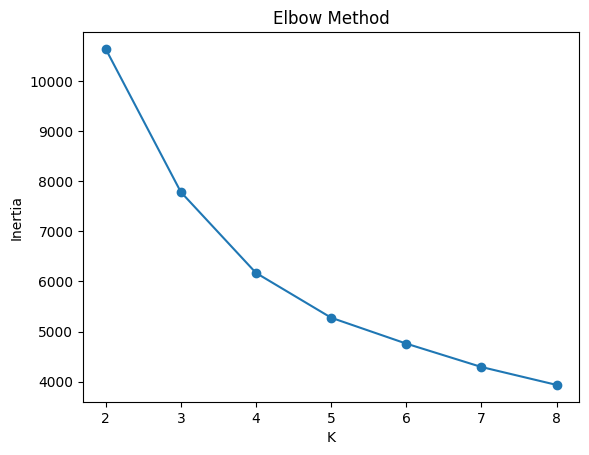

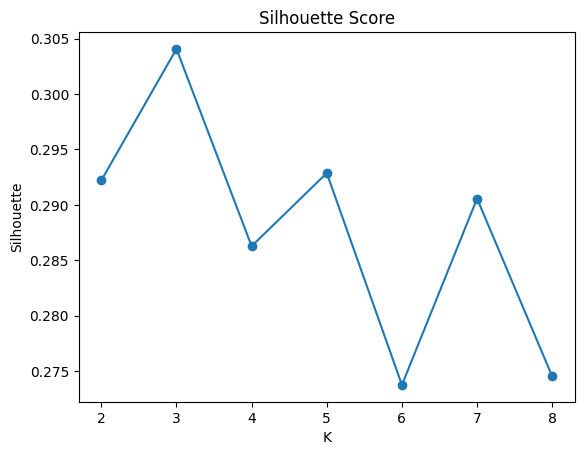

In [44]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(list(K_range), inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

plt.figure()
plt.plot(list(K_range), sil_scores, marker="o")
plt.title("Silhouette Score")
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.show()


In [45]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
customer["cluster"] = kmeans.fit_predict(X)

customer[["Member_number","cluster"]].head()


,Member_number,cluster
0,1000,2
1,1001,2
2,1002,0
3,1003,0
4,1004,2


In [46]:
cluster_summary = customer.groupby("cluster")[["num_transactions","avg_basket_size","max_basket_size","recency_days"]].mean()
cluster_summary


,num_transactions,avg_basket_size,max_basket_size,recency_days
cluster,,,,
0,2.972784,2.281778,2.674961,119.213841
1,3.615079,3.743293,6.206349,138.450397
2,5.798253,2.516657,3.845115,107.760921
3,2.376914,2.253396,2.551237,435.816254


In [47]:
customer["cluster"].value_counts()


cluster
0    1286
2    1259
3     849
1     504
Name: count, dtype: int64

In [48]:
customer.head()

,Member_number,num_transactions,avg_basket_size,max_basket_size,recency_days,cluster
0,1000,5,2.600,4,35,2
1,1001,5,2.400,3,260,2
2,1002,4,2.000,2,122,0
3,1003,4,1.750,2,89,0
4,1004,8,2.625,4,321,2


In [49]:
cluster_names = {
    0: "Occasional Shoppers",
    1: "Bulk/Big-Basket Shoppers",
    2: "Frequent Regulars",
    3: "Inactive/Lost Customers"
}

customer["cluster_name"] = customer["cluster"].map(cluster_names)
customer[["Member_number","cluster","cluster_name"]].head()


,Member_number,cluster,cluster_name
0,1000,2,Frequent Regulars
1,1001,2,Frequent Regulars
2,1002,0,Occasional Shoppers
3,1003,0,Occasional Shoppers
4,1004,2,Frequent Regulars


In [50]:
customer["cluster_name"].value_counts()


cluster_name
Occasional Shoppers         1286
Frequent Regulars           1259
Inactive/Lost Customers      849
Bulk/Big-Basket Shoppers     504
Name: count, dtype: int64

In [51]:
tx_cluster = tx.merge(customer[["Member_number","cluster_name"]], on="Member_number", how="left")
tx_cluster.head()


,Member_number,Date,basket_size,total_items,cluster_name
0,1000,2014-06-24,3,3,Frequent Regulars
1,1000,2015-03-15,4,4,Frequent Regulars
2,1000,2015-05-27,2,2,Frequent Regulars
3,1000,2015-07-24,2,2,Frequent Regulars
4,1000,2015-11-25,2,2,Frequent Regulars


In [52]:
df_cluster = df.merge(customer[["Member_number","cluster_name"]], on="Member_number", how="left")

top_by_cluster = (df_cluster.groupby("cluster_name")["itemDescription"]
                  .value_counts()
                  .groupby(level=0)
                  .head(10)
                  .reset_index(name="count"))

top_by_cluster


,cluster_name,itemDescription,count
0,Bulk/Big-Basket Shoppers,whole milk,424
1,Bulk/Big-Basket Shoppers,other vegetables,310
2,Bulk/Big-Basket Shoppers,rolls/buns,264
3,Bulk/Big-Basket Shoppers,yogurt,239
4,Bulk/Big-Basket Shoppers,soda,235
5,Bulk/Big-Basket Shoppers,sausage,200
6,Bulk/Big-Basket Shoppers,root vegetables,181
7,Bulk/Big-Basket Shoppers,tropical fruit,172
8,Bulk/Big-Basket Shoppers,bottled water,168
9,Bulk/Big-Basket Shoppers,citrus fruit,154


In [53]:
top10_wide = (top_by_cluster
              .assign(rank=top_by_cluster.groupby("cluster_name").cumcount()+1)
              .pivot(index="rank", columns="cluster_name", values="itemDescription"))

top10_wide


cluster_name,Bulk/Big-Basket Shoppers,Frequent Regulars,Inactive/Lost Customers,Occasional Shoppers
rank,,,,
1,whole milk,whole milk,whole milk,whole milk
2,other vegetables,other vegetables,other vegetables,rolls/buns
3,rolls/buns,rolls/buns,rolls/buns,other vegetables
4,yogurt,soda,soda,soda
5,soda,yogurt,yogurt,yogurt
6,sausage,root vegetables,bottled water,root vegetables
7,root vegetables,tropical fruit,tropical fruit,tropical fruit
8,tropical fruit,sausage,root vegetables,bottled water
9,bottled water,bottled water,shopping bags,sausage


In [54]:
top10_counts = (top_by_cluster
                .assign(rank=top_by_cluster.groupby("cluster_name").cumcount()+1)
                .pivot(index="rank", columns="cluster_name", values="count"))

top10_counts


cluster_name,Bulk/Big-Basket Shoppers,Frequent Regulars,Inactive/Lost Customers,Occasional Shoppers
rank,,,,
1,424,1208,264,606
2,310,939,233,422
3,264,807,223,416
4,239,703,201,375
5,235,621,178,296
6,200,507,133,266
7,181,491,118,251
8,172,443,117,220
9,168,412,104,208


In [55]:
top_by_cluster[["cluster_name","itemDescription","count","share"]].head(20)


C:\ProgramData\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\ProgramData\anaconda3\Lib\ast.py:602: DeprecationWarning: Constant.__init__ got an unexpected keyword argument 's'. Support for arbitrary keyword arguments is deprecated and will be removed in Python 3.15.
  return Constant(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\ast.py:602: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\ast.py:602: DeprecationWarning: Constant.__init__ missing 1 required positional argument: 'value'. This will become an error in Python 3.15.
  return Constant(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instea

KeyError: "['share'] not in index"

In [ ]:
cluster_order = top_by_cluster["cluster_name"].unique()

for cname in cluster_order:
    temp = top_by_cluster[top_by_cluster["cluster_name"] == cname].copy()

    plt.figure(figsize=(7,4))
    plt.barh(temp["itemDescription"][::-1], temp["count"][::-1])
    plt.title(f"Top 10 Items - {cname}")
    plt.xlabel("Count")
    plt.tight_layout()
    plt.show()


In [ ]:
def cooccurrence_heatmap(df_sub, top_n=10, title="Heatmap"):
    df_sub = df_sub.copy()
    df_sub["TransactionID"] = df_sub["Member_number"].astype(str) + "_" + df_sub["Date"].dt.strftime("%Y-%m-%d")
    baskets_sub = df_sub.groupby("TransactionID")["itemDescription"].apply(lambda x: set(x))
    top_items = df_sub["itemDescription"].value_counts().head(top_n).index.tolist()
    co = pd.DataFrame(0, index=top_items, columns=top_items)

    for b in baskets_sub:
        present = [i for i in top_items if i in b]
        for a in present:
            for c in present:
                if a != c:
                    co.loc[a, c] += 1

    plt.figure(figsize=(8,6))
    plt.imshow(co, aspect="auto")
    plt.xticks(range(len(top_items)), top_items, rotation=90)
    plt.yticks(range(len(top_items)), top_items)
    plt.colorbar(label="Co-occurrence count")
    plt.title(title)
    plt.tight_layout()
    plt.show()
for cname in customer["cluster_name"].unique():
    df_sub = df_cluster[df_cluster["cluster_name"] == cname]
    cooccurrence_heatmap(df_sub, top_n=10, title=f"Co-occurrence Heatmap - {cname}")


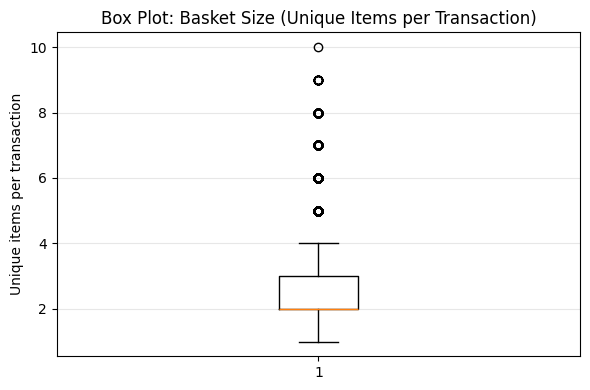

count    14963.000000
mean         2.539999
std          1.060993
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: itemDescription, dtype: float64


In [56]:

basket_sizes = df.groupby("TransactionID")["itemDescription"].nunique()

plt.figure(figsize=(6,4))
plt.boxplot(basket_sizes, vert=True)
plt.title("Box Plot: Basket Size (Unique Items per Transaction)")
plt.ylabel("Unique items per transaction")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

print(basket_sizes.describe())


C:\Users\lenovo\AppData\Local\Temp\ipykernel_28536\2490449192.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, vert=True)


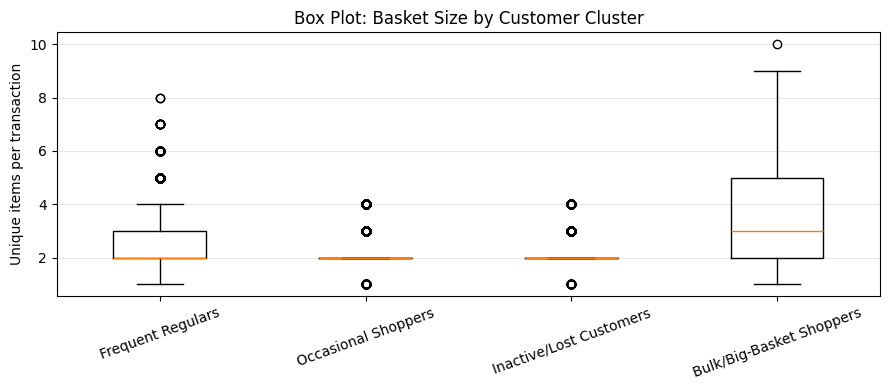

In [57]:
# Build transaction table with cluster_name
tx = df.groupby(["Member_number","Date"]).agg(
    basket_size=("itemDescription","nunique")
).reset_index()

tx = tx.merge(customer[["Member_number","cluster_name"]], on="Member_number", how="left")

groups = [tx.loc[tx["cluster_name"]==c, "basket_size"].values
          for c in tx["cluster_name"].dropna().unique()]
labels = tx["cluster_name"].dropna().unique()

plt.figure(figsize=(9,4))
plt.boxplot(groups, labels=labels, vert=True)
plt.title("Box Plot: Basket Size by Customer Cluster")
plt.ylabel("Unique items per transaction")
plt.xticks(rotation=20)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


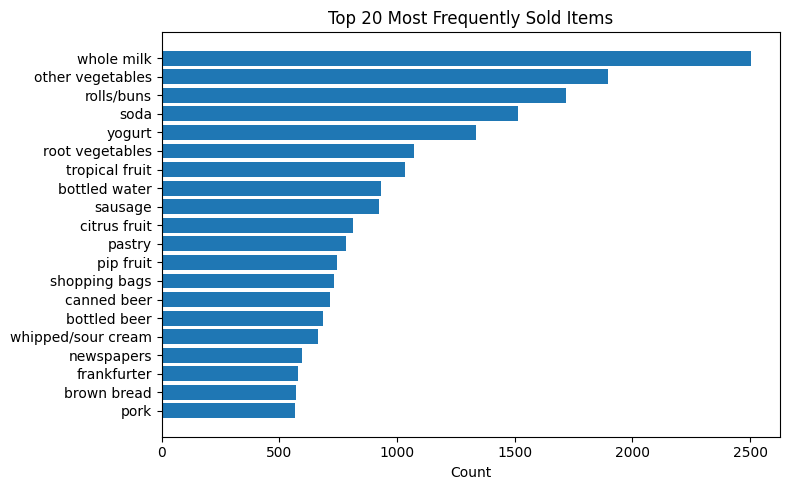

In [58]:
top_items = df["itemDescription"].value_counts().head(20)
plt.figure(figsize=(8,5))
plt.barh(top_items.index[::-1], top_items.values[::-1])
plt.title("Top 20 Most Frequently Sold Items")
plt.xlabel("Count")
plt.tight_layout()
plt.show()
